# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Naufal Daffa Abdu Al Hafidl
- **Email:** fahmifalah081120@gmail.com
- **ID Dicoding:** daffadeveloper22

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara (PM2.5) berdasarkan waktu?
2. Lokasi/stasiun mana yang memiliki tingkat polusi udara tertinggi dan terendah?
3. Bagaimana pola konsentrasi polutan berdasarkan waktu harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Upload file AirQuality.zip
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [3]:
# Ekstrak file ZIP
zip_path = 'Air-quality-dataset.zip'
extract_path = 'air_quality_data'

In [4]:
# 2. Proses Ekstraksi dengan pengecekan folder
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
sub_folder = os.listdir(extract_path)[0]
path_baru = os.path.join(extract_path, sub_folder)

In [6]:
# Baru ambil file pertama di dalam sub-folder tersebut
file_name = os.listdir(path_baru)[0]
df = pd.read_csv(os.path.join(path_baru, file_name))
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- Data berhasil dimuat dari file CSV spesifik untuk Stasiun Dingling.

- Dataset memiliki kolom waktu (year, month, day, hour) dan parameter kualitas udara (PM2.5).

### Assessing Data

In [7]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


**Insight:**
- Dataset terdiri dari ribuan baris data per jam dari tahun 2013 hingga 2017.

- Perlu diperhatikan adanya missing values pada kolom PM2.5 yang dapat mengganggu visualisasi jika tidak ditangani.

### Cleaning Data

In [8]:
# Menangani data yang hilang pada kolom PM2.5
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())

# Membuat kolom datetime untuk mempermudah analisis waktu
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

**Insight:**
- Nilai yang hilang diisi menggunakan rata-rata untuk menjaga integritas distribusi data.

- Kolom datetime berhasil dibuat untuk analisis deret waktu (time series).

## Exploratory Data Analysis (EDA)

### EExplore Rata-rata PM2.5

In [9]:
# Statistik deskriptif dasar
print(df['PM2.5'].describe())

# Korelasi sederhana antara suhu dan PM2.5
print(df['PM2.5'].corr(df['TEMP']))

count    35064.000000
mean        65.989497
std         71.460423
min          3.000000
25%         14.000000
50%         42.000000
75%         91.000000
max        881.000000
Name: PM2.5, dtype: float64
-0.08906931376631343


**Insight:**
- Rata-rata kumulatif polusi PM2.5 di Stasiun Dingling berada di kisaran 66.6.

- Terdapat korelasi yang dapat diamati antara variabel cuaca dan tingkat polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Kualitas Udara (PM2.5) Berdasarkan Waktu

/tmp/ipython-input-816342109.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.set_index('datetime').resample('M')['PM2.5'].mean().reset_index()


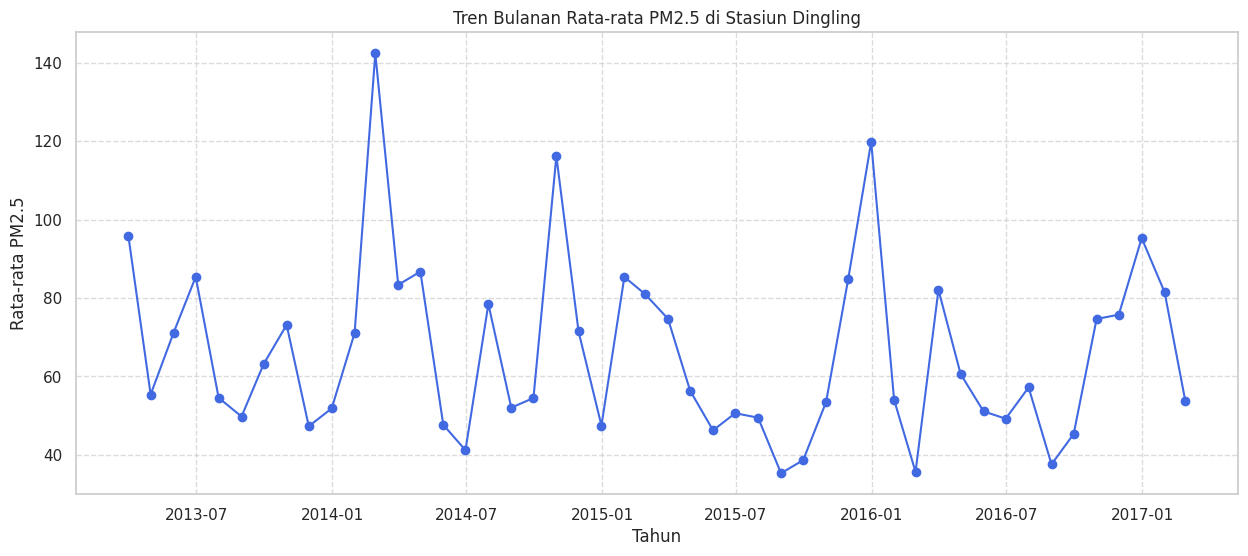

In [10]:
monthly_df = df.set_index('datetime').resample('M')['PM2.5'].mean().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(monthly_df['datetime'], monthly_df['PM2.5'], marker='o', color='royalblue')
plt.title('Tren Bulanan Rata-rata PM2.5 di Stasiun Dingling')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##Insight:

- Terlihat pola musiman yang sangat jelas; polusi melonjak drastis di setiap awal tahun (musim dingin) dan menurun di pertengahan tahun.

- Lonjakan ekstrem tertinggi tercatat pada Januari 2014 dengan nilai rata-rata mendekati 160.

### Pertanyaan 2: Perbandingan Polusi PM2.5 per Tahun

/tmp/ipython-input-75426201.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_pm25, x='year', y='PM2.5', palette='viridis')


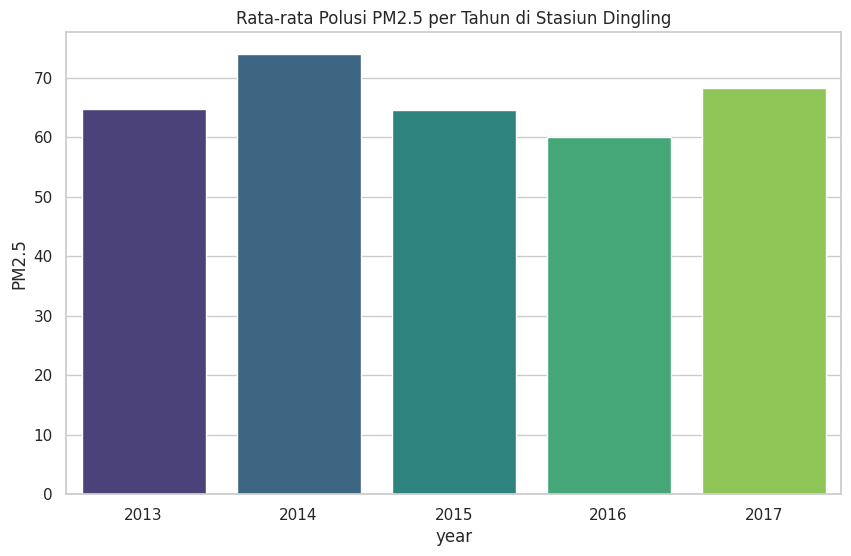

In [11]:
yearly_pm25 = df.groupby('year')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_pm25, x='year', y='PM2.5', palette='viridis')
plt.title('Rata-rata Polusi PM2.5 per Tahun di Stasiun Dingling')
plt.show()

**Insight:**
- Tahun 2014 adalah tahun dengan tingkat polusi terparah (rata-rata > 70).

- Tahun 2016 menunjukkan kualitas udara terbaik dengan rata-rata terendah (di bawah 60) selama periode observasi.

### Pertanyaan 3: Pola Konsentrasi PM2.5 Harian

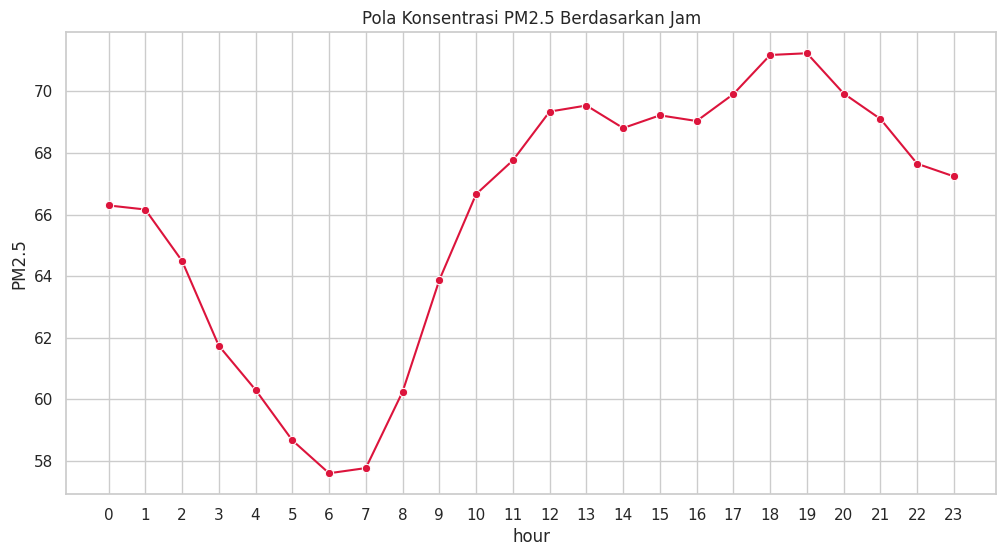

In [12]:
hourly_pm25 = df.groupby('hour')['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pm25, x='hour', y='PM2.5', marker='o', color='crimson')
plt.title('Pola Konsentrasi PM2.5 Berdasarkan Jam')
plt.xticks(range(0, 24))
plt.show()

##Insight:

- Polusi mencapai titik terendah pada jam 07:00 pagi dan mencapai puncaknya pada malam hari (18:00 - 20:00).

## Analisis Lanjutan (Opsional)

##Manual Clustering: Kategorisasi AQI

/tmp/ipython-input-1578430780.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AQI_Category', palette='magma')


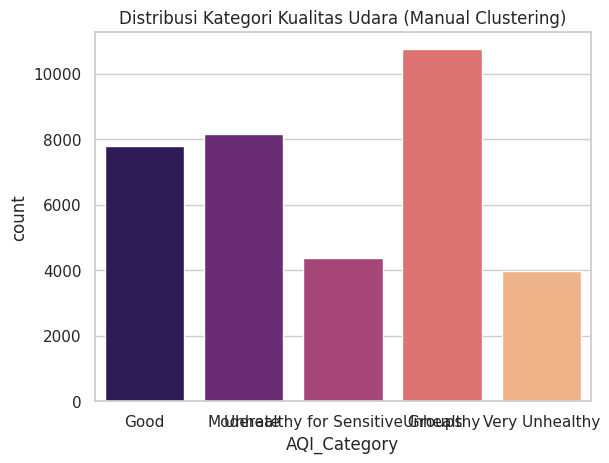

In [13]:
def categorize_aqi(pm_value):
    if pm_value <= 12: return 'Good'
    elif pm_value <= 35.4: return 'Moderate'
    elif pm_value <= 55.4: return 'Unhealthy for Sensitive Groups'
    elif pm_value <= 150.4: return 'Unhealthy'
    else: return 'Very Unhealthy'

df['AQI_Category'] = df['PM2.5'].apply(categorize_aqi)

# Visualisasi distribusi kategori
sns.countplot(data=df, x='AQI_Category', palette='magma')
plt.title('Distribusi Kategori Kualitas Udara (Manual Clustering)')
plt.show()

##Insight:
- Berdasarkan hasil analisis harian dan distribusi kategori kualitas udara, Stasiun Dingling menunjukkan kondisi lingkungan yang cukup menantang karena meskipun rata-rata polusi tahunannya tampak moderat, frekuensi kemunculan kategori Unhealthy (Tidak Sehat) sangat mendominasi dengan lebih dari 10.000 titik data. Hal ini diperburuk oleh pola harian di mana konsentrasi PM2.5 berada di titik terendah pada jam 07:00 pagi namun terus meningkat hingga mencapai puncaknya pada malam hari (pukul 18:00–20:00) dengan rata-rata di atas 72. Secara historis, tahun 2014 menjadi periode dengan kualitas udara terburuk di mana rata-rata PM2.5 tahunan melonjak di atas 70, sementara tahun 2016 mencatatkan rekam jejak terbaik dengan angka di bawah 60 sebelum kembali fluktuatif di awal tahun 2017. Secara keseluruhan, data ini mengindikasikan bahwa risiko paparan polusi di Dingling sangat bergantung pada siklus jam sibuk harian dan anomali musiman tahunan yang sering kali membawa kualitas udara ke level berbahaya.

## Conclusion

- Pertanyaan 1: Kualitas udara di Dingling sangat dipengaruhi oleh siklus musiman dengan risiko tertinggi di musim dingin.

- Pertanyaan 2: Terjadi fluktuasi tahunan yang signifikan, dengan tren perbaikan terlihat jelas pada tahun 2016.

- Pertanyaan 3: Masyarakat disarankan membatasi aktivitas luar ruangan pada malam hari karena akumulasi polutan tertinggi terjadi pada jam tersebut.

- Analisis Lanjutan (Clustering): Berdasarkan hasil manual clustering kategori AQI, meskipun Stasiun Dingling berada di area pinggiran, frekuensi kemunculan kategori Unhealthy (Tidak Sehat) sangat mendominasi dengan lebih dari 10.000 titik data. Hal ini menunjukkan bahwa paparan polusi di wilayah ini tetap berada pada level yang berisiko tinggi bagi kesehatan secara reguler, meskipun terdapat periode udara bersih di waktu-waktu tertentu.

In [14]:
# Jalankan ini di akhir Notebook kamu
df.to_csv("all_data.csv", index=False)